# Barplot

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
mobile = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-11-10/mobile.csv")
landline = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-11-10/landline.csv")

In [3]:
data = pd.merge(
    landline, mobile,
    how="outer", on=["code", "year", "entity", "continent", "gdp_per_cap"]
)

In [4]:
df = data.loc[
    data["code"].eq("UKR") & data["mobile_subs"].notnull(), 
    ["year", "landline_subs", "mobile_subs"]
]

In [5]:
colors = {"landline_subs": "#EEE8A9", "mobile_subs": "#009bda"}

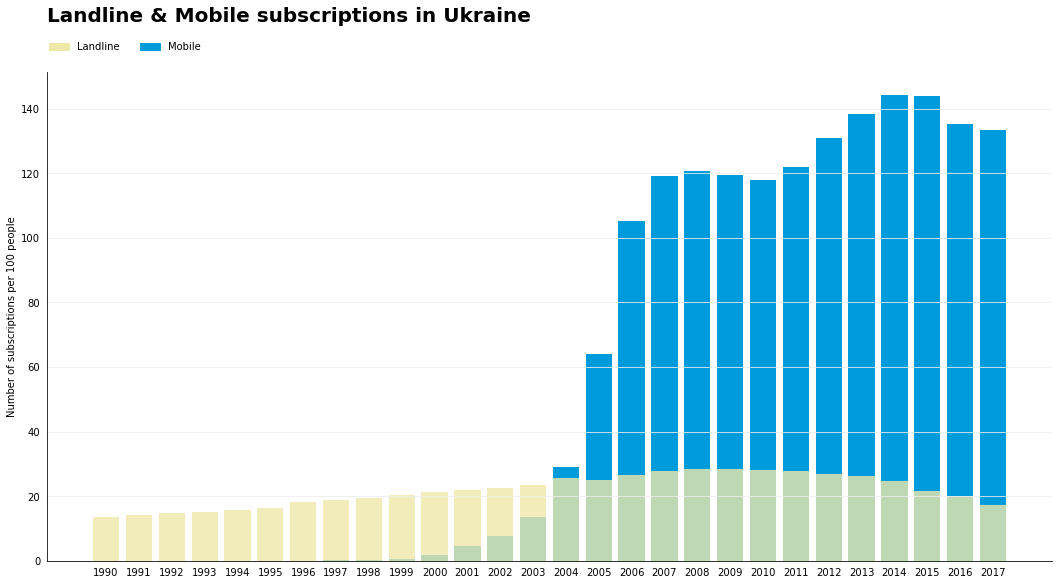

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(18,9))

ax.bar(df["year"], df["mobile_subs"], color=colors.get("mobile_subs"), label="mobile_subs", tick_label=df["year"])
ax.bar(df["year"], df["landline_subs"], color=colors.get("landline_subs"), label="landline_subs", alpha=0.8)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(bottom=False, left=False)
ax.yaxis.grid(True, color='#EEEEEE')

plt.ylabel('Number of subscriptions per 100 people')


fig.suptitle("Landline & Mobile subscriptions in Ukraine", fontsize=20, fontweight='bold',x=0.125,ha='left')
handles = [mpatches.Patch(color=colors.get(t), label=t.split("_")[0].title()) for t in df.iloc[:, 1:].columns]
fig.legend(handles=handles,loc=9,ncol=4,frameon=False,bbox_to_anchor=(0.005, 0.45, 0.36, 0.49))
fig.savefig('../figures/mobile_ukr_hist.png', dpi = 300, bbox_inches = 'tight', pad_inches=0.3, transparent=False)

---

# PyWaffle

In [6]:
import math
from pywaffle import Waffle

In [7]:
years = [1995,2005,2015]

data = df.loc[df["year"].isin(years)]
waffle = (
    data.assign(
        non_subs=np.where(
            data["mobile_subs"]<100, 
            100-data["mobile_subs"], 
            0
        )
    )
    .set_index("year")
    .loc[:, ["mobile_subs", "non_subs"]]
)
waffle

,mobile_subs,non_subs
year,,
1995,0.027502,99.972498
2005,64.005365,35.994635
2015,143.983655,0.000000


In [8]:
plots_container = {}
for ax, year in zip(("313", "312", "311"), years):
    _df = waffle.loc[year, ["mobile_subs", "non_subs"]]
    
    values = _df.values
    max_subs = math.ceil(_df["mobile_subs"].max())
    
    plots = {
        "values": values,
        "title": {
            "label": f"{year}: {max_subs} mobile subscribers per 100 people",
            "loc": "left"
        }
    }
    plots_container[ax] = plots

In [9]:
plots_container

{'313': {'values': array([2.75018442e-02, 9.99724982e+01]),
  'title': {'label': '1995: 1 mobile subscribers per 100 people',
   'loc': 'left'}},
 '312': {'values': array([64.00536482, 35.99463518]),
  'title': {'label': '2005: 65 mobile subscribers per 100 people',
   'loc': 'left'}},
 '311': {'values': array([143.98365541,   0.        ]),
  'title': {'label': '2015: 144 mobile subscribers per 100 people',
   'loc': 'left'}}}

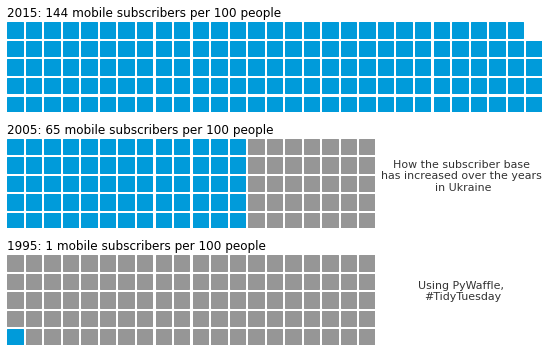

In [11]:
fig = plt.figure(
    FigureClass=Waffle,
    plots=plots_container,
    rows=5,
    colors=("#009bda","#969696"),
    figsize=(9, 5) 
)

notes = ["How the subscriber base \nhas increased over the years \nin Ukraine", "Using PyWaffle, \n#TidyTuesday"]
loc = [0.5, 0.18]

for note, y in zip(notes, loc):
    fig.text(
        x=0.72,
        y=y,
        s=note,
        ha="center",
        va="center",
        rotation=0,
        fontsize=11,
        color='black',
        alpha=0.8,
    )
    
fig.savefig('../figures/mobile_ukr.png', dpi = 300, bbox_inches = 'tight', pad_inches=0.3, transparent=False)